# Fit the digit dataset with Keras

In [ ]:
### Load dataset
from sklearn import datasets

digits = datasets.load_digits()

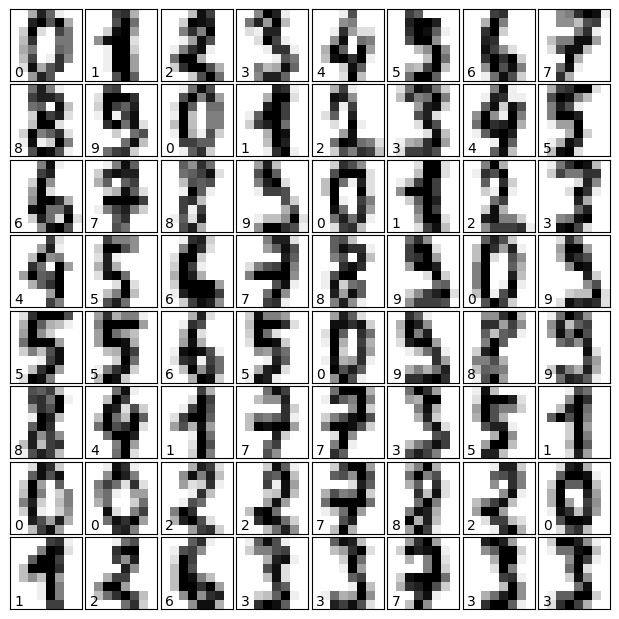

In [ ]:
### Plot dataset
import matplotlib.pyplot as plt

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [ ]:
### Split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size=0.2, random_state=1)
X_train.shape, y_train.shape

### One Hot Encode labels
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(y_train.reshape(-1, 1))
y_train = ohe.transform(y_train.reshape(-1, 1))
y_test = ohe.transform(y_test.reshape(-1, 1))
X_train.shape
y_train.shape

$$[ TODO Students ]$$
>* Build a Keras model, fit them, babysit them and evaluate them

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [ ]:
# Build a Keras model whith hidden layers=[25, 50, 50, 25]
# Choose activation function for each layers
inputs = Input(shape=(8*8, ))

x = Dense(25, activation='relu')(inputs)
x = Dense(50, activation='relu')(x)
x = Dense(50, activation='relu')(x)
x = Dense(25, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

In [ ]:
# Compile the model --> Choose loss, metrics and optimizer
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

#Categorical cross-entropy : the loss function that the model will use during training. It measures the dissimilarity between the predicted class probabilities and the actual one-hot encoded class labels.
#optimizer=Adam(learning_rate=0.001) : the optimizer that will be used to update the model's weights during training
#The learning_rate parameter sets the step size for weight updates. An appropriate learning rate value is crucial for the training process.
#metrics=['accuracy']=the evaluation metric(s) that will be calculated and reported during training. In this case we are tracking the 'accuracy' metric(measures the classification accuracy of the model on the training and validation data. It is the fraction of correctly classified samples)

In [ ]:
# Check the number of parameters
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_15 (Dense)            (None, 25)                1625      
                                                                 
 dense_16 (Dense)            (None, 50)                1300      
                                                                 
 dense_17 (Dense)            (None, 50)                2550      
                                                                 
 dense_18 (Dense)            (None, 25)                1275      
                                                                 
 dense_19 (Dense)            (None, 10)                260       
                                                                 
Total params: 7010 (27.38 KB)
Trainable params: 7010 (27.38

In [ ]:
# Train the model - validation split=0.2
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64)
#validation_split: This parameter is set to 0.2, which means that 20% of the training data will be used as a validation set during training. The model's performance on the validation set will be monitored, and this can help detect overfitting.
#epochs: the number of times the entire training dataset will be passed forward and backward through the neural network. In this case, you are training the model for 10 epochs, meaning it will go through the training data 10 times to update the model's weights.
#batch_size: This parameter determines the number of samples used in each iteration (mini-batch) for updating the model's weights. A batch size of 64 means that 64 samples will be processed together before updating the weights. This can speed up training and help with gradient estimation.
#This object typically contains training and validation loss and accuracy values over epochs.

Epoch 1/10
18/18 [==============================] - 1s 16ms/step - loss: 1.9890 - accuracy: 0.3325 - val_loss: 1.5673 - val_accuracy: 0.4722
Epoch 2/10
18/18 [==============================] - 0s 5ms/step - loss: 1.2133 - accuracy: 0.6179 - val_loss: 1.0884 - val_accuracy: 0.6736
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.7949 - accuracy: 0.7502 - val_loss: 0.7634 - val_accuracy: 0.8021
Epoch 4/10
18/18 [==============================] - 0s 5ms/step - loss: 0.5242 - accuracy: 0.8512 - val_loss: 0.5644 - val_accuracy: 0.8403
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 0.3607 - accuracy: 0.8964 - val_loss: 0.4345 - val_accuracy: 0.8819
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.2759 - accuracy: 0.9182 - val_loss: 0.3700 - val_accuracy: 0.8993
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.2136 - accuracy: 0.9426 - val_loss: 0.3085 - val_accuracy: 0.9201
Epoch 8/10
18/18 [=

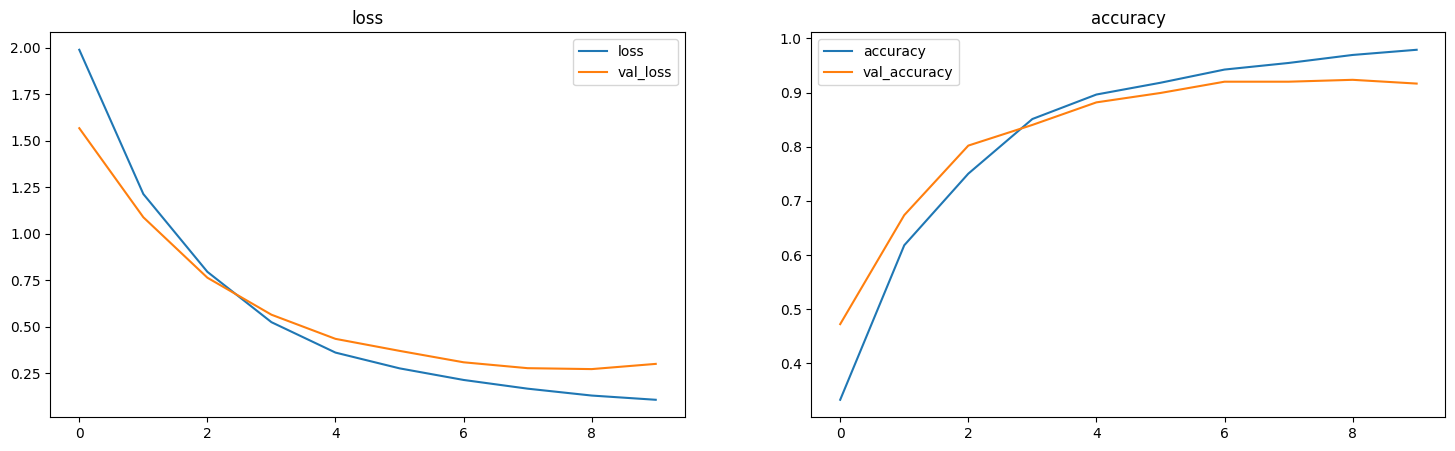

In [ ]:
# Babysit the model
def plot(history): # It's always the same function.
    keys = [key for key in history.keys() if key[:4] != "val_"] #The purpose of this is to plot training metrics separately from validation metrics.
    fig, ax = plt.subplots(nrows=1, ncols=len(keys), figsize=(18, 5))
    for i, key in enumerate(keys):
        ax[i].plot(history[key], label=key)
        if "val_"+key in history.keys():
            ax[i].plot(history["val_"+key], label="val_"+key)
        ax[i].legend()
        ax[i].set_title(key)
    plt.show()

plot(history.history)

#filters out keys that start with "val_" because these are typically validation metrics.

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)  #After obtaining the predicted probabilities, this line finds the class with the highest probability (i.e., the predicted class) for each test example. The result is an array of predicted class labels for the test set.
y_test_labels = y_test.argmax(axis=1) #
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(accuracy)

12/12 [==============================] - 0s 3ms/step
0.9277777777777778
